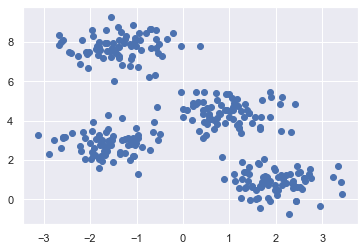

In [6]:
#import the libraries

import matplotlib.pyplot as plt
#for plotting the style
import seaborn as sns ;sns.set()
import numpy as np
from sklearn.datasets.samples_generator import make_blobs
#make_blobs() is used for generating isotropic Gaussian blobs for clustering.
X,y_true = make_blobs(n_samples=300,centers=4,cluster_std=0.60,random_state=0) #centres is number of clusters,0.60 is std cluster std.
plt.scatter(X[:,0],X[:,1]); 

In [8]:
#Training the model 
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=4) #set k=4 by creating a instance.
kmeans.fit(X) #Computer the cluster with k=4(can think like assign random centroids)
y_kmeans=kmeans.predict(X) # Each data point it allocates a cluster(Predict the closest cluster each sample in X belongs to.)
y_kmeans # it is the cluster number for each data point , say clust0,1,2,3
print(X.shape[0])

300


Labels:[3 1 0 1 3 2 3 2 1 1 3 1 2 1 3 2 2 3 3 3 2 3 0 3 3 2 3 2 3 2 1 1 2 1 1 1 1
 1 3 3 2 3 0 2 3 3 1 3 1 3 3 3 1 3 2 3 1 3 1 3 1 2 1 3 3 3 1 3 1 3 2 3 1 3
 3 1 3 2 3 1 3 2 3 3 1 0 3 0 1 1 2 3 1 3 3 2 3 2 0 3 1 3 1 3 2 3 3 0 1 0 3
 3 3 1 3 2 1 3 3 0 3 3 3 3 3 3 3 3 3 3 1 3 3 3 1 3 3 1 3 1 1 3 2 3 0 3 1 2
 1 1 1 2 0 2 3 3 1 3 3 0 1 2 2 3 2 3 3 2 3 2 2 1 3 0 3 1 2 3 2 3 3 2 3 3 2
 2 0 2 2 1 3 3 2 2 3 3 3 2 3 1 2 3 3 3 2 1 3 1 2 1 2 3 2 0 1 3 3 3 3 2 1 3
 3 3 3 3 3 1 1 0 2 1 2 3 3 2 3 3 1 3 2 2 2 1 1 1 1 3 3 0 0 3 3 2 3 3 3 3 3
 1 2 2 3 3 1 3 2 1 0 3 3 3 3 2 2 3 3 0 1 1 2 2 2 3 3 2 1 3 1 2 3 3 1 1 1 3
 2 2 1 3]
New-Centers:[[ 0.996244    5.28262763]
 [-1.39262004  7.7943098 ]
 [ 1.26533912  3.65658566]
 [-0.03528305  1.93369899]]
Labels:[3 1 0 1 3 3 3 2 1 1 3 1 0 1 3 2 0 3 3 3 2 3 0 3 3 0 3 0 3 2 1 1 2 1 1 1 1
 1 3 3 2 3 0 2 3 3 1 3 1 3 3 3 1 3 2 3 1 3 1 3 1 2 1 3 3 3 1 3 1 3 2 3 1 3
 3 1 3 0 3 1 3 2 3 3 1 0 3 0 1 1 2 3 1 3 3 2 3 3 0 3 1 3 1 3 0 3 3 0 1 0 3
 3 3 1 3 2 1 3 3 0 3 3 3 3 3 3

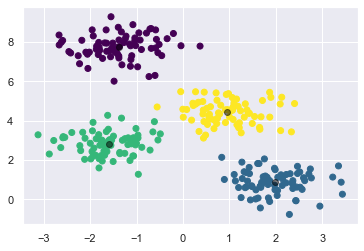

In [18]:
#Implementation of the k-means algorithm
from sklearn.metrics import pairwise_distances_argmin  #it will calculate dist between 2 points and check which is the closest


def find_clusters(X,n_clusters,rseed=2):
    #1 Randomly choose the centroids which is the centers 
    rng=np.random.RandomState(rseed)
    i= rng.permutation(X.shape[0])[:n_clusters] #X.shape[0]=300 randomly permuate 300 elements 
    centers=X[i] # random elements are present in centers.
    
    while True:
        #2.a Assign labels based on closest center 
        labels=pairwise_distances_argmin(X,centers)
        print("Labels:"+str(labels))
        
        #2.b Find new centers from means of points
        new_centers = np.array([X[labels==i].mean(0)
                               for i in range(n_clusters)])
        print("New-Centers:"+str(new_centers))
        
        #2.c Check for convergence when new centers and the old centers positions are same.
        if np.all(centers==new_centers):
            break
        centers=new_centers
        
    return centers,labels

centers,labels=find_clusters(X,4)
plt.scatter(X[:,0],X[:,1],c=y_kmeans,cmap='viridis')
plt.scatter(centers[:,0],centers[:,1],c='black',s  =200,alpha=0.5); #gettng the dot on clusters

#Conclusion:
#Therefore the plot shows the Walmart location and the diffrent clusters are the sales.
#Disadv of tis approach is that , old centers and new centers change will be very minor it wont converege , then the while loop keeps running .





